# Money Cannot Buy Happiness 
I was reading "Hands on Machine Learning with Scikit Learn and Tensorflow" (a very good book, if I may add), there was the example on Model Based Learning, the author asked; Suppose you want to know if money makes people happy, and it got me thinking, how would I go about answering this? 
I put down the book without further reading and started searching. 

### Can Money Buy You Happiness? 
So I decided if i wanted to answer this, I should go beyond an individual person and think in terms of countries, there is such thing as the World Happiness Report to record this information. It is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives. To no one's surprise, Finland is the happiest country in the world. Norway, Denmark, Iceland and Switzerland hold the next top positions. The report was published on 14 March 2018 by UN. 

I did what any data scientist would do, I went to Wikipedia and scraped the data. The acquired from Wikipedia included: Rank, country, happiness scores, GDP, social support, healthy life expectancy, freedom to make life choices, generosity and perceptions of corruption. I also decided to add Suicide rates statics for each country according to data from the World Health Organization (WHO). A country's suicide rate is determined by its age-adjusted total rate (per 100,000 population) of deaths officially recorded as suicides in the most recent available year(2016). The process of scraping and cleaning the data was straightforward (for a change) and didn't take more than two hours. 

In [1]:
import numpy as np 
import pandas as pd 
import urllib.request
from bs4 import BeautifulSoup
import requests

In [40]:
url_rank = 'https://en.wikipedia.org/wiki/World_Happiness_Report'
r = requests.get(url_rank).text
soup = BeautifulSoup(r,'lxml')
table = soup.find('table', class_ = 'wikitable sortable')
rank = []
countries_links = []
scores = []
GDP = []
social_support = []
healthy_life_expectancy = []
freedom_to_make_life_choices = []
generosity = []
perceptions_of_corruption = []
for row in table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells)==9: #Only extract date column with no heading
            rank.append(cells[0].find(text=True))  
            countries_links.append(cells[1].find(title=True)) 
            scores.append(cells[2].find(text=True))
            GDP.append(cells[3].find(text=True))
            social_support.append(cells[4].find(text=True))
            healthy_life_expectancy.append(cells[5].find(text=True))
            freedom_to_make_life_choices.append(cells[6].find(text=True))
            generosity.append(cells[7].find(text=True))
            perceptions_of_corruption.append(cells[8].find(text=True))

In [41]:
countries = []
for country in countries_links: 
                countries.append(country.get('title'))
len(countries)

156

In [42]:
df_happiness = pd.DataFrame({"rank": rank, 'countries':countries,'scores':scores,'GDP':GDP,
                             'social_support':social_support,
                            'healthy_life_expectancy':healthy_life_expectancy,
                             'freedom_to_make_life_choices':freedom_to_make_life_choices,
                             'generosity':generosity,'perceptions_of_corruption':perceptions_of_corruption})
df_happiness.head()

,rank,countries,scores,GDP,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [43]:
url_suicide = 'https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate#endnote_data_updated_2018'
r = requests.get(url_suicide).text
soup = BeautifulSoup(r,'lxml')
table = soup.find('table', class_ = 'wikitable sortable')
suicide_rank = []
countries_suicide_links = []
both_sexes = []

for row in table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells)==9: #Only extract date column with no heading
            suicide_rank.append(cells[0].find(text=True))  
            countries_suicide_links.append(cells[1].find(title=True)) 
            both_sexes.append(cells[3].find(text=True))
            

countries = []
for country in countries_suicide_links: 
                countries.append(country.get('title'))

In [44]:
df_suicide = pd.DataFrame({"suicide_rank": suicide_rank, 'countries':countries,
                           'suicide_both_sexes':both_sexes})
df_suicide.head()

,suicide_rank,countries,suicide_both_sexes
0,1,Guyana,30.2
1,2,Lesotho,28.9
2,3,Russia,26.5
3,4,Lithuania,25.7
4,5,Suriname,23.2


In [45]:
df = pd.merge(df_happiness,df_suicide,on='countries')
df.head()

,rank,countries,scores,GDP,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,suicide_rank,suicide_both_sexes
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.192,0.393,32,13.8
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,74,10.1
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,89,9.2
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,40,13.3
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,61,11.3


In [46]:
df = df.drop(['rank', 'suicide_rank'], axis=1)

In [47]:
#Standerizing all data by normilizing it between 0 and 1

from sklearn import preprocessing
%matplotlib inline

x = df[['scores','GDP','social_support','healthy_life_expectancy','freedom_to_make_life_choices'
       ,'suicide_both_sexes','generosity']].values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df[['scores','GDP','social_support','healthy_life_expectancy','freedom_to_make_life_choices'
       ,'suicide_both_sexes','generosity']] = pd.DataFrame(x_scaled)


In [48]:
df.to_excel('money_happiness.xlsx', engine='xlsxwriter') 

In [49]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

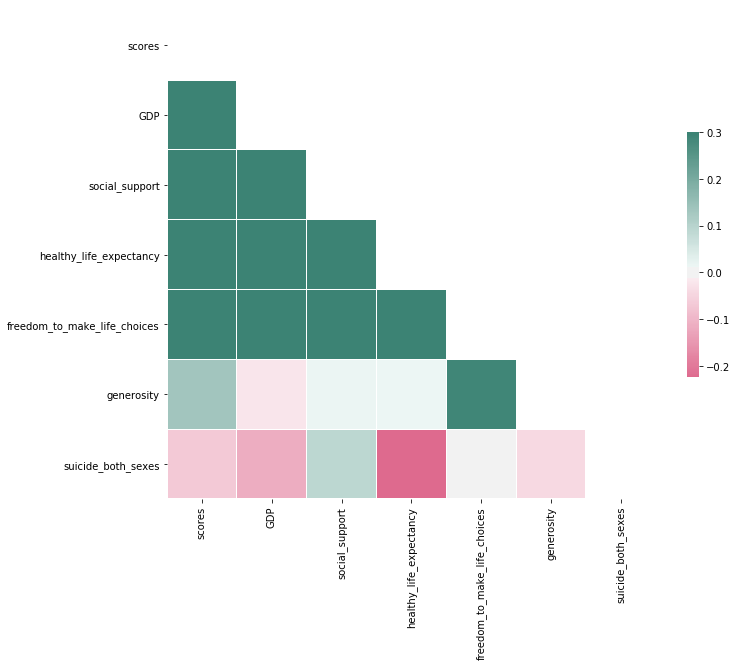

In [50]:
correlation_data= df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(359, 169, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [51]:
df_plot = df.set_index('countries')

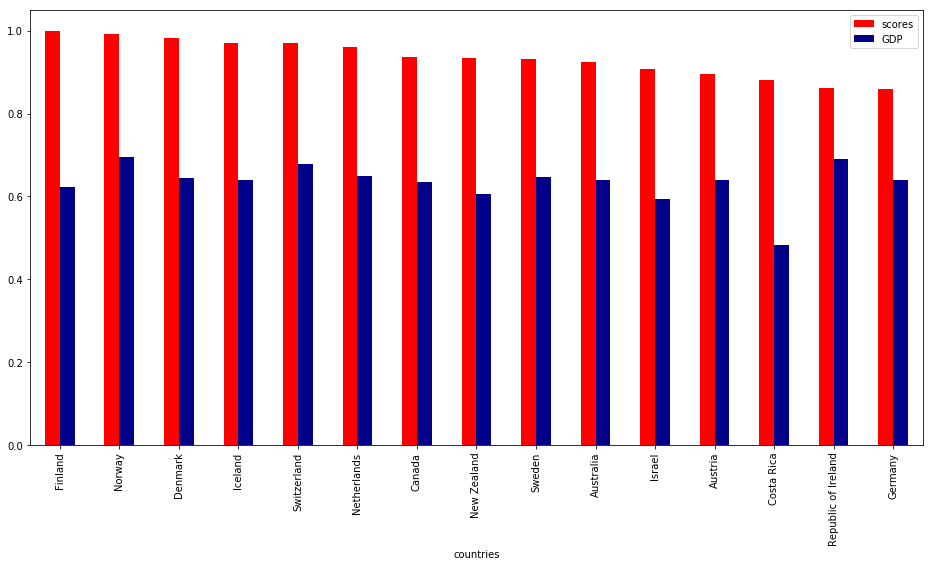

In [52]:
df_plot[['scores','GDP']][:15].plot(kind='bar',color=('r','DarkBlue','g'),figsize=(16,8));


0.8037777137213659


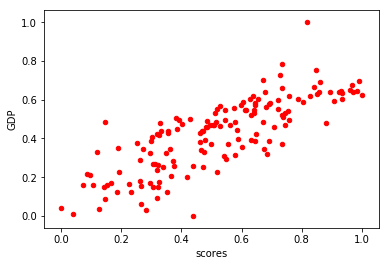

In [53]:
corr = df['scores'].corr(df['GDP'])
print(corr)
df.plot.scatter(x='scores', y='GDP', c='r');

Correlation between the two variable is equal to 0.8, indicating very positive relationship, meaning that if one variable decreases, the other variable decreases, or one variable increases, the other will also increases. 

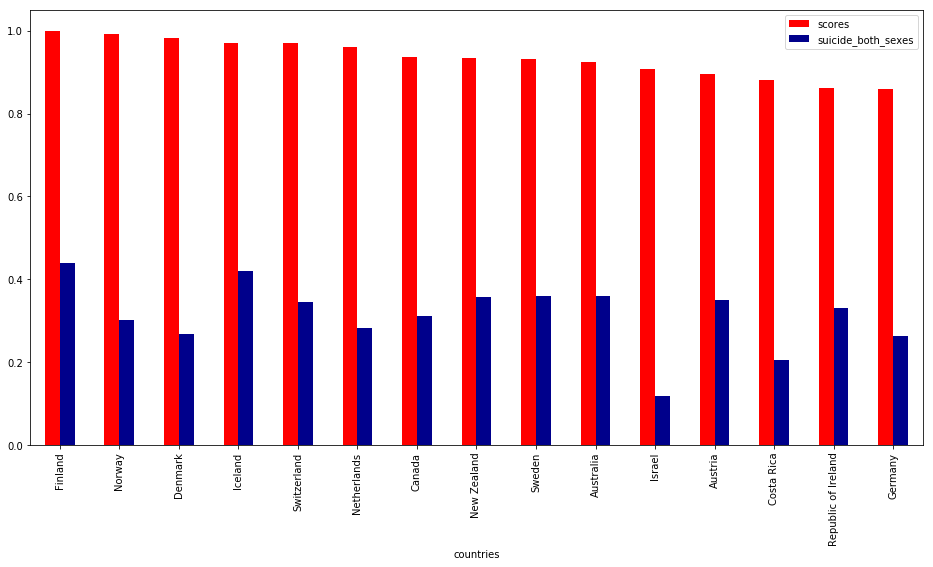

In [54]:
variables

One thing we can take from this bar plot is some of happiest countries in the world have what we can consider high suicide rate, like Finland, Iceland Sweden and New Zealand. This phenomenon is refereed to as the paradox of high rates of suicide in happy places. The researches argue that: people judge their well-being in comparison to others around them. These types of comparison effects have also been shown with regards to income, unemployment, crime, and obesity. In other words, misery likes company, it's easier to be miserable in an environment where everyone else is miserable.

There has been a dispute over this "paradox" and how accurate it really is, other researchers have shown that it does not exist; "One of the things we know about suicide, as well as homicide, is that it's not equally distributed. The overall suicide rate is helpful, but not nearly as helpful as looking at different groups of people and the areas where the increase has occurred in particular."

What I personally think though, we should not disregard the first conclusion completely but acknowledge that it lacks more understanding than just stating statically entities.

-0.06729449274626194


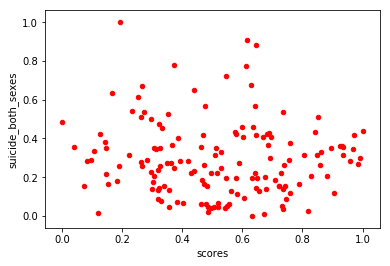

In [55]:
corr_2 = df['scores'].corr(df['suicide_both_sexes'])
print(corr_2)
df.plot.scatter(x='scores', y='suicide_both_sexes', c='r');

We can see there is a slightly negative relationship or inverse relationship between two variables, which means the higher values of one variable, the lower values of the other. So we can say there is -0.067 correlation between happiness scores and suicide rate, more accurately we disregard a strong relationship between the two. 

# Machine Learning Model

Now, I went back to the book and studied the answer, we had a similar approach but I gathered more data than needed for the model, so I took the same method in building my regression model. So I modeled Happiness Scores as a linear function of GDP per capita. 
I used few regression algorithms, K nearest neighbor proved to have the highest accuracy 70%, (not that great I know). I could have added more attributes, used GDP of each country across the years not just 2018 and so on. 

I figured it a bit out of the scope of the example and called it a day with 70% accuracy to maybe work on it more some other time. 


In [56]:
# keep only countries, GDP and scores. 
df = df[['countries','GDP','scores']]

In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [58]:
df_onehot = pd.get_dummies(df, columns=['countries'])
features=df_onehot.loc[:, df_onehot.columns != 'scores']
label=df['scores']
features.head()

,GDP,countries_Afghanistan,countries_Albania,countries_Algeria,countries_Angola,countries_Argentina,countries_Armenia,countries_Australia,countries_Austria,countries_Azerbaijan,...,countries_United Arab Emirates,countries_United Kingdom,countries_United States,countries_Uruguay,countries_Uzbekistan,countries_Venezuela,countries_Vietnam,countries_Yemen,countries_Zambia,countries_Zimbabwe
0,0.622615,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.694656,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.644561,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.640744,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.677481,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 

In [60]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.25, random_state=42)

In [61]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor(),
    LinearRegression(),
KNeighborsRegressor(n_neighbors=7)]

In [62]:
model_train=list(map(compare_models,models)) 


In [63]:
model_train

[['GradientBoostingRegressor', 0.6993557835890197],
 ['RandomForestRegressor', 0.6903121699932337],
 ['SVR', 0.1843653088902898],
 ['DecisionTreeRegressor', 0.5219344540922709],
 ['LinearRegression', 0.07678855423152009],
 ['KNeighborsRegressor', 0.7053458605441314]]

In [64]:
# using KNeighborsRegressor 
clf=KNeighborsRegressor(n_neighbors=7)
model=clf.fit(train_data,train_labels)
y_pred=model.predict(test_data)
r2=r2_score(test_labels,y_pred)
print(r2)

0.7053458605441314


## Sources Used: 
https://en.wikipedia.org/wiki/World_Happiness_Report
https://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate
https://www.sciencedaily.com/releases/2011/04/110421082641.htm
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
http://index-of.es/Varios-2/Hands%20on%20Machine%20Learning%20with%20Scikit%20Learn%20and%20Tensorflow.pdf
https://www.colorado.edu/asmagazine/2018/08/18/paradox-suicide-happy-places-seems-not-exist
https://ramsresearch.nl/rumour-or-reality-suicidal-scandinavians/

Tableau Visulization: 
https://public.tableau.com/profile/hajir.almahdi#!/vizhome/MoneyandHappiness/Story1